In [27]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import decode_predictions

from IPython.display import display, Image

In [33]:
def imread_tf(filename, target_shape=None):
    content = tf.io.read_file(filename)
    image = tf.image.decode_image(content)
    image = tf.expand_dims(image, axis=0)
    
    if target_shape != None:
        image = tf.image.resize(image, size=[target_shape, target_shape])
    
    return image

In [4]:
model = EfficientNetB0()

2021-11-21 07:57:16.840687: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 07:57:16.841937: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-21 07:57:16.842127: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-21 07:57:16.861259: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-21 07:57:16.861605: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

21848064/21834768 [==============================] - 3s 0us/step


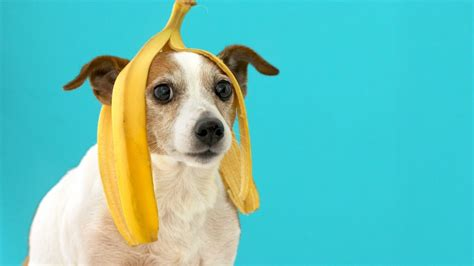

In [23]:
filename = '../images/dog.jpeg'
image = imread_tf(filename)
display( Image(filename) )

In [29]:
model.input_shape

(None, 224, 224, 3)

In [40]:
image = imread_tf(filename, target_shape=224)
y_pred = model.predict(image)
decode_pred = decode_predictions(y_pred)

display(decode_pred)

[[('n02093428', 'American_Staffordshire_terrier', 0.27946708),
  ('n02091032', 'Italian_greyhound', 0.24416196),
  ('n02091134', 'whippet', 0.15109101),
  ('n02093256', 'Staffordshire_bullterrier', 0.059272684),
  ('n02089973', 'English_foxhound', 0.030041156)]]

In [43]:
pred_class = decode_pred[0][0][1]
pred_conf  = decode_pred[0][0][2]

print('Class: {} | Confidence: {}%'.format(pred_class, int(pred_conf*100)))

Class: American_Staffordshire_terrier | Confidence: 27%
